In [1]:
import numpy as np
#from scipy.integrate import solve_ivp
#from scipy.signal import spectrogram
#from pyaxi_numerics import set_params, solve_system, get_text_params

%load_ext autoreload
%autoreload 2

verbosity = 9
use_tex_format = True

if use_tex_format:
    import matplotlib as mpl
    mpl.use('agg')
import matplotlib.pyplot as plt

In [2]:
# LaTeX Formatting for Plots
if use_tex_format:
    plt.rcParams.update({
        'text.usetex': True,
        'font.family': 'serif',
    })
    plt.rc('text', usetex=True)
    plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

    SMALL_SIZE  = 8
    MEDIUM_SIZE = 16
    BIGGER_SIZE = 20

    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    '''
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the x tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the y tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', labelsize=BIGGER_SIZE, titlesize=BIGGER_SIZE)  # fontsize of the figure title
    '''

# Scratchwork

In [ ]:
# TODO
sklearn_process = False
if sklearn_process:
    from sklearn.neural_network import MLPClassifier, MLPRegressor
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import train_test_split
    from sklearn.svm import SVC

    ## TODO: Data generation, importing, and preprocessing

    # TODO: load dataset
    from sklearn.datasets import make_classification
    X, y = make_classification(random_state = 0, n_features = 20, n_informative = 18, n_classes = 3)

    # TODO: split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
# TODO
if sklearn_process:
    # Create dataset processing and classification pipeline
    model_svc = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
    model_mlp = Pipeline([('scaler', StandardScaler()), ('mlp', MLPRegressor(max_iter=400))])
    models = [model_svc, model_mlp]

    # Fit model to training dataset
    for model in models:
        print(list(model.named_steps.keys())[1])
        model.fit(X_train, y_train)
        # Evaluate fit with test dataset
        print("Score: %.2f" % model.score(X_test, y_test))
        print(" --------------------------------------- ")

In [ ]:
## Optical Depth Calculations (WIP)
if True:
    import numpy as np
    c = 2.998e10   # [cm/s]
    h = 6.582e-16  # [eV s]
    G = 6.674e-13  # [N cm^2/g^2]
    
    # parameters of theory
    l1 = l2 = l3 = l4 = 1.  # unitless
    L3 = L4 = 1e11          # [eV]
    example_eps = 1.        # unitless
    example_Fpi = 1e21      # [eV]
    unitless_e  = 0.3       # unitless electron charge
    M_planck = np.sqrt(h*2*np.pi*c/G)
    
    ## Scattering Cross-Section
    k_example = 1            # [m]  =  3.85e+13 [Hz]
    m_example = 1            # [m]
    u_example = 1.414e-06    # [eV]
    coupling_example = 1
    cutoff_example   = 1e5   # [eV]
    k_cutoff_example = 200   # [m]
    
    cs_to_units = lambda cs: cs * (h ** 2) * (c**3)
    # crossterm FFdual
    cross_sec_1 = lambda k=k_example, m=m_example, l=coupling_example, L=cutoff_example, c=c, h=h, G=G: (((l ** 2) * m)/(6*np.pi*(L**4))) * ((k ** 4)/((m + 2*k)**3))
    # pi_0 FFdual (TODO)
    cross_sec_0 = lambda k=k_example, m=m_example, l=coupling_example, L=cutoff_example, c=c, h=h, G=G: 0
    
    print('Example cross-section values:')
    #print('   sigma_0 = %.3e [eV]^-2 = %.3e [cm]^2' % (cross_sec_0(), cs_to_units(cross_sec_0())))
    print('   sigma_1 = %.3e [eV]^-2 = %.3e [cm]^2' % (cross_sec_1(), cs_to_units(cross_sec_1())))
    
    ## Optical Depth
    density_example = 4e9   # [eV/cm^3]
    
    # Simple optical depth calculation (tau = sigma * n)
    tau_simple = lambda cs, rho=density_example, m_u=u_example, c=c: (rho/m_u) * cs_to_units(cs)
    # Weinberg calculation
    # TODO: check the definitions and units on these
    tau_weinberg = lambda cs, rho=density_example, m_u=u_example, k_u=u_example, k_peak=k_example, k_step=1, k_max=k_cutoff_example, c=c: (rho/m_u) / ((k_u*k_peak*c)*h) * np.sum([cs(k) for k in np.arange(1,k_cutoff_example,k_step)])
    
    print('\nExample optical depth values:')
    #print('   tau_0 (simple) = %.3e [cm]^-1' % tau_simple(cross_sec_0()))
    #print('   tau_0 (weinberg) = %.3e [cm]^-1' % tau_weinberg(cross_sec_0()))
    print('   tau_1 (simple) = %.3e [cm]^-1' % tau_simple(cross_sec_1()))
    print('   tau_1 (weinberg) = %.3e [???]' % tau_weinberg(cross_sec_1))

Example cross-section values:
   sigma_1 = 1.965e-23 [eV]^-2 = 2.294e-22 [cm]^2

Example optical depth values:
   tau_1 (simple) = 6.489e-07 [cm]^-1
   tau_1 (weinberg) = 1.318e+08 [???]


In [ ]:
### Length Scales of different astrophysical scenarios
##       - TODO:  Astrophysical or formation motivated reasoning for selecting a given Mass or Radius to solve for, given density
##       - TODO:  Axion minicluster (planetary), Axion star, axion clump (~5 parsec), axion DM galaxy halo, galaxy supercluster-sized halo

## TODO: - Compare different length scales and energy density values against optical depth.
##       - Sanity check to ensure that optical depth is not too high

M_sun    = 1.988e33    # [g]
M_sun_eV = 1.115e66    # [eV/c^2]
g_to_eV  = 5.61e32     # [eV/c^2]
pc_to_cm = 3.086e18    # [cm]

## Axion Stars
R_star = 1.          # [cm], can be determined by mass
M_star = 1.          # [m_sun], can be determined by radius
# ALP properties
m_axion = (m_example * u_example)
g_axion = (coupling_example / cutoff_example)
# axion decay constant
f_axion = example_Fpi
# initial axion field amplitude
a_0 = 1.

## Axion star radius relations
# TODO: Find a better reference than (Iwazaki 2022), whose units don't make any sense
# note: per above, R_star ~ 1/k_axion
fixed_M = True
if fixed_M:
    R_star = 1./(G * m_axion**2 * (M_star*M_sun))
else:
    M_star = (np.pi * (1./2) * (m_axion/g_to_eV)**2 * (f_axion/(g_to_eV * c**2))**2 * a_0**2 * R_star**3) / M_sun

# Critical Coupling (Chung-Jukko 2023)
# (values of coupling constant above this will rapidly decay via parametric resonance)
g_crit = (1.66e-17)/(1e9) * ((M_star)*(m_axion/1e-11))**(-1.35)     # [eV]^-1
# (timescale of decay)
t_crit = (g_axion - g_crit)**(-0.87)     # [TODO: units???]

# Axion star energy density
rho_star = (M_star*M_sun*g_to_eV)/((4/3)*np.pi*R_star**3)    # [eV / cm^3]

# Axion star optical properties:
print('Axion Star:')
print('   M = %.1f [m_sun]   |   R = %.3e [cm]   |   rho = %.3e [eV/cm^3]  |   m_a = %.3e [eV]   |   g_crit = %0.1e [eV]^-1' % (M_star, R_star, rho_star, m_axion, g_crit))
print('Optical Depth: ')
#print('   tau_0 (simple) = %.3e [cm]^-1' % tau_simple(cross_sec_0(), rho=rho_star, m_u=m_axion))
#print('   tau_0 (weinberg) = %.3e [cm]^-1' % tau_weinberg(cross_sec_0(), rho=rho_star, m_u=m_axion))
print('   tau_1 (simple) = %.3e [cm]^-1' % tau_simple(cross_sec_1(), rho=rho_star, m_u=m_axion))
print('   tau(R) = %.3e' % (tau_simple(cross_sec_1(), rho=rho_star, m_u=m_axion)*R_star))
print('   tau_1 (weinberg) = %.3e [???]' % tau_weinberg(cross_sec_1, rho=rho_star, m_u=m_axion))
print('   tau(R) = %.3e' % (tau_weinberg(cross_sec_1, rho=rho_star, m_u=m_axion)*R_star))

## TODO: Axion Miniclusters

## TODO: Axion Halos

Axion Star:
   M = 1.0 [m_sun]   |   R = 3.770e-10 [cm]   |   rho = 4.970e+93 [eV/cm^3]  |   m_a = 1.414e-06 [eV]   |   g_crit = 1.8e-33 [eV]^-1
Optical Depth: 
   tau_1 (simple) = 8.063e+77 [cm]^-1
   tau(R) = 3.039e+68
   tau_1 (weinberg) = 1.638e+92 [???]
   tau(R) = 6.175e+82


# Misc. Tools

In [ ]:
## Optionally solve for certain model-dependent parameters
if True:
    from pyaxi_utils import fit_Fpi
    
    eps_in = 1e-10
    l1_in  = 1
    m_axion = 1e-10     # desired QCD axion reference mass
    
    F_fit = fit_Fpi(m_axion, eps_in, l1_in, fit_QCD=True, verbosity=9)

Fitting pi-axiverse to QCD axion parameter space
QCD    |    m_a  = 1.0e-10 [eV]
       |    g_a  = 3.8e-20 [GeV^-1]
       |    z_ag = 5.2e-02
       |    C_ag = 1.9e+00
pi-axi |    eps  = 1.0e-10   ----->   F_pi = 5.2e-01 [GeV]   ----->   m_I = 1.9e-29 [eV]
       |    m_pi = 1.0e-10 [eV]
       |    g_pi = 3.8e-20 [GeV^-1]
       |    z_pi = 5.2e-02
       |    C_pi = -1.7e-17


In [2]:
## Scan log files for large batch runs and identify errored/missing ARGFILE lines
## (Optionally rename log files accordingly)
import os
from tools.dataset_utils import scan_log_files

# Path to where log files are stored
log_dir = os.path.expanduser('~/projects/pyAxiverse/logs/piaxi_main1/')
#log_dir = os.path.expanduser('~/projects/pyAxiverse/logs/piaxi_debug1_alt/')
#log_dir = os.path.expanduser('~/projects/pyAxiverse/logs/piaxi_debug1/')

# Path to where data files are stored
output_dir = os.path.expanduser('~/projects/pyAxiverse/data/piaxiverse_main1/')
#output_dir = os.path.expanduser('~/projects/pyAxiverse/data/piaxiverse_debug1_alt/')
#output_dir = os.path.expanduser('~/projects/pyAxiverse/data/piaxiverse_debug1/')

# Path to scratch storage space (recycling bin for redundant log files)
scratch_dir = os.path.expanduser('~/scratch/pyAxiverse/logs/scratch/piaxi_main1/')
#scratch_dir = os.path.expanduser('~/scratch/pyAxiverse/logs/scratch/piaxi_debug1_alt/')
#scratch_dir = os.path.expanduser('~/scratch/pyAxiverse/logs/scratch/piaxi_debug1/')

# Path to locally stored argfile (necessary if this path is different from the original path used when the script was first run)
argfile_dir = os.path.expanduser('~/projects/pyAxiverse/ARGFILES/piaxiverse_main1_SU3_seeded')
#argfile_dir = os.path.expanduser('~/projects/pyAxiverse/ARGFILES/piaxiverse_main1_SU3_seeded_n25_alt')

if True:
    # Set output_unsuccessful_lines to True if you want to print the unsuccessful job LINE numbers
    scan_log_files(log_dir, output_dir, scratch_dir, rename_in_place=True, output_errored=True, argfile_in=argfile_dir, reseed_argfile=False, remove_redundant=True, max_line_num=25, verbosity=2)
    #scan_log_files(log_dir, output_dir, scratch_dir, rename_in_place=False, output_errored=True, argfile_in=argfile_dir, reseed_argfile=True, remove_redundant=True, max_line_num=22680, verbosity=1) # 22680


: 

In [19]:
from astropy import units, constants

# Unitful constants 

G_SI = 6.674e-11 # [N m^2 / kg^2]
c_SI = 2.998e8   # [m / s]
h_SI = 1.055e-34 # [kg m^2 / s]
h_eV = 6.582e-16 # [eV s]

G_hep = 4.215e-56 # [1 / eV^2]
c_hep = 1
h_hep = 1

G_cgs = 6.674e-8  # [dyne cm^2 / g^2]
c_cgs = 2.998e10  # [cm / s]
h_cgs = 1.055e-27 # [erg  s]

G_natural = 1
c_natural = 1
h_natural = 1

G_geometric = 1
c_geometric = 1
h_geometric = 2.612e-76  # [km^2]

# Print values in different unit systems
example_Fpi = 1e10  # [GeV]
example_L4  = 1e10  # [GeV]
example_mpi = 1e-8  # [eV]
mpi_unit = units.def_unit('mpi', example_mpi * units.eV)

print('Inputs: ')
print('    F_pi = %.1e [Gev]' % example_Fpi)
print('    L4   = %.1e [Gev]' % example_L4)
print('    m_pi = %.1e [eV]'  % example_mpi)

print('SI')
print('    F_pi = %s' % str((example_Fpi*units.GeV).to('m^2 kg /s^2')))
print('    L4   = %s' % str((example_L4*units.GeV).to('m^2 kg /s^2')))
print('    m_pi = %s' % str((example_mpi*units.eV).to('kg', equivalencies=units.mass_energy())))

print('natural')
print('    F_pi = %s' % str((example_Fpi*units.GeV).to('m^2 kg /s^2', equivalencies=units.mass_energy())))
print('    L4   = %s' % str((example_L4*units.GeV).to('m^2 kg /s^2', equivalencies=units.mass_energy())))
print('    m_pi = %s' % str((example_mpi*units.eV).to('kg', equivalencies=units.mass_energy())))

print('mpi')
print('    F_pi = %s' % str((example_Fpi*units.GeV).to(mpi_unit)))
print('    L4   = %s' % str((example_L4*units.GeV).to(mpi_unit)))
print('    m_pi = %s' % str((example_mpi*units.eV).to(mpi_unit)))

Inputs: 
    F_pi = 1.0e+10 [Gev]
    L4   = 1.0e+10 [Gev]
    m_pi = 1.0e-08 [eV]
SI
    F_pi = 1.6021766339999999 kg m2 / s2
    L4   = 1.6021766339999999 kg m2 / s2
    m_pi = 1.7826619216278976e-44 kg
natural
    F_pi = 1.6021766339999999 kg m2 / s2
    L4   = 1.6021766339999999 kg m2 / s2
    m_pi = 1.7826619216278976e-44 kg
mpi
    F_pi = 1e+27 mpi
    L4   = 1e+27 mpi
    m_pi = 1.0 mpi


In [6]:
from astropy import units, constants

print(constants.G.to('N m^2 / kg^2'))
print(constants.c.to('m / s'))
print(constants.hbar.to('m^2 kg / s'))

print(constants.G.to('fm^5 s^-4 / eV', equivalencies=[units.mass_energy(), units.spectral()]))
print((constants.hbar*(constants.G / constants.c**3)).to('km^2', equivalencies=[units.mass_energy(), units.spectral()]))

6.6743e-11 m2 N / kg2
299792458.0 m / s
1.0545718176461565e-34 kg m2 / s
1.0693407508306193e+46 fm5 / (eV s4)
2.6122803039748722e-76 km2


# Analysis

In [ ]:
## Plot Single Case
if True:
    from pyaxi_utils import plot_single_case, load_single_result
    
    res_filename = 'piaxiverse_main1_SU3_line10017_7eb53abc8c4b757743bf2d2d3d6d6b9c06f81dad.json'
    k_samples = [0,4,10,20,30] # Plot these specific k-values only
    #k_samples = None # Use default k_values from plotting function if present in result file

    #plot_single_case('3_neutrals_5f6d4c42050e31fa8d06ce7d9fc526e1eff881f3.json', output_dir='./test_data/', version='v2.8', tex_fmt=use_tex_format)
    plot_single_case(res_filename, output_dir='./data/piaxiverse_main1_SU3_clean', version='', 
                     plot_res=True, plot_nums=True, plot_coeffs=True, plot_spectrum=True,
                     add_colorbars=False, plot_parameters=False, k_samples_in=k_samples,
                     tex_fmt=use_tex_format, nested_folders=False, verbosity=1,
                     save_plots=False)

In [ ]:
## TODO/WIP: Properly label and/or mask forbidden or experimentally excluded regions of parameter space
# TODO: Plot theoretically forbidden regions on AxionPhoton plots?
def enforce_constraints(series_in):
    """Enforce a series of optional constraints on parameter space selections."""

    # Label whether or not F_pi and QCD axion conform to desired relations
    series_in['fit_F_pi'] = check_Fpi_fit(series_in['eps'], series_in['m_u'], series_in['l1'], series_in['F'], sens=2., fit_QCD=False, verbosity=0)
    series_in['fit_QCD']  = check_Fpi_fit(series_in['eps'], series_in['m_u'], series_in['l1'], series_in['F'], sens=2., fit_QCD=True,  verbosity=0)

    # WIP: Enforce cosmologically stable lifetimes
    is_cosmo_stable = lambda m_in, F_pi=series_in['F'], eps=series_in['eps']: cosmo_stability(m_in, F_pi, eps) <= 1.2

    ## Freeze-in Relic Density for charged species
    H_infl = 1e19   # Hubble at Inflation [eV]
    T_re   = 1e18   # Temperature of reheating [eV]
    w_re   = 0      # Equation of state (at reheating)
    M_pl   = 1.2e27 # Planck Mass [eV]
    rd_a = lambda m_in, H=H_infl, M=M_pl: m_in/np.sqrt(H*M)
    rd_b = lambda T=T_re, H=H_infl, M=M_pl: np.sqrt(H*M)/T
    relic_density_charged = lambda m_in, F_pi, eps, w=w_re, H=H_infl, T=T_re, M=M_pl: \
        (5e-3) * (((10*np.pi**2)**(-w/(1+w)))/(2*(1+w))) * (eps**4) * (np.exp(10*(3-rd_a(m_in,H,M)*np.sqrt(rd_b(T,H,M))))/(rd_b(T,H,M)**(4/(1+w)-(1/2))))

    # WIP: Enforce minimal charged relic density
    omega_c = np.sum([relic_density_charged(mc_in, F_pi=series_in['F'], eps=series_in['eps']) for mc_in in series_in['m'][2]])
    is_crd_min = lambda m_in: relic_density_charged(m_in, F_pi=series_in['F'], eps=series_in['eps']) <= 0.01
    
    return series_in

## Distribution Analysis

In [ ]:
## Load and prepare data for a specified category of runs
from tools.dataset_utils import prepare_data, get_units_fmt

# name of config identifier/subfolder from which to import data. Use 'all' for all (non-debug) datasets of a given version number.
conf_name = 'piaxiverse_main1_SU3_clean'
#conf_name='all'

version   = ''
#version   = 'v3.2.8'

reclass_method = None
#reclass_method = 'heaviside'

params_data, results_data, coeffs_data, units_df = prepare_data(output_root='./data', config_name=conf_name, version=version, reclassify=reclass_method, 
                                                                recalc_phase_diffs=True, recalc_couplings=True, load_images=False, combined_folder=True)
print(params_data.columns)

units_fmt = get_units_fmt(units_df, verbosity)

if False:
    for param_row in params_data[:5]['Th']:
        print(param_row)
        print([Th_item for Th_cat in calc_global_phase_diffs(param_row, verbosity=9) for Th_item in Th_cat])

In [ ]:
from tools.dataset_utils import plot_heatmaps, plot_scatter

## WIP: Visualize imported data for a category of runs
plot_heatmaps(params_data)
plot_scatter(params_data)

In [ ]:
## Analyze a run's plots TODO/WIP
if False:

    # Sample data (replace with actual data)
    #params, results, _, coeffs = load_single_result(filename='3_neutrals_5f6d4c42050e31fa8d06ce7d9fc526e1eff881f3', output_dir='./test_data/v2.8/3_neutrals/')
    

    # Placeholder for raw solution (replace with actual data when available)
    data = params_data
    raw_solution = results_data
    print(results_data)

    # Heatmap for raw solution
    plt.figure(figsize=(12, 8))
    sns.heatmap(raw_solution, cmap='viridis')
    plt.title("Heatmap of Raw Solution (Amplitude of Photon Field)")
    plt.xlabel("k-mode")
    plt.ylabel("Time")
    plt.show()

    # Bar plots for k_mean_arr, k_peak_arr, and k_sens_arr
    k_modes = np.arange(1, len(data["k_mean_arr"]) + 1)
    plt.figure(figsize=(12, 8))
    plt.bar(k_modes, data["k_mean_arr"], label="k_mean_arr", alpha=0.6)
    plt.bar(k_modes, data["k_peak_arr"], label="k_peak_arr", alpha=0.6)
    plt.bar(k_modes, data["k_sens_arr"], label="k_sens_arr", alpha=0.6)
    plt.xlabel("k-mode")
    plt.ylabel("Value")
    plt.title("Bar Plots for k_mean_arr, k_peak_arr, and k_sens_arr")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Categorical plot for k_class_arr
    plt.figure(figsize=(12, 8))
    sns.countplot(data["k_class_arr"])
    plt.title("Distribution of Classification Labels")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()


In [12]:
## TODO: k-mode instability (floquet) plots
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_k_vs_parameter_heatmap(df, parameter, mode='absolute'):
    # Extract global k range
    global_k_min = df['k_span'].apply(lambda x: x[0]).min()
    global_k_max = df['k_span'].apply(lambda x: x[1]).max()
    k_values = np.linspace(global_k_min, global_k_max, 500)  # Sampled k-values

    param_values = df[parameter].unique()
    heatmap_grid = np.zeros((len(param_values), len(k_values)))

    for i, param_val in enumerate(param_values):
        subset = df[df[parameter] == param_val]
        for j, k_val in enumerate(k_values):
            count = 0
            for _, row in subset.iterrows():
                k_min, k_max = row['k_span']
                if k_val >= k_min and k_val <= k_max:
                    index = np.argmin(np.abs(row['k_sens_arr'] - k_val))
                    if row['k_class_arr'][index] == 'res':
                        count += 1
            if mode == 'fraction':
                count /= len(subset)
            heatmap_grid[i, j] = count

    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_grid, xticklabels=50, yticklabels=param_values, cmap="YlGnBu")
    plt.xlabel('k-values')
    plt.ylabel(parameter)
    title = f"Heatmap of 'res' count in k_class_arr vs. {parameter}"
    if mode == 'fraction':
        title += " (fraction)"
    plt.title(title)
    plt.show()

if False:
    plot_k_vs_parameter_heatmap(params_data, 'm_u')
    plot_k_vs_parameter_heatmap(params_data, 'F')
    plot_k_vs_parameter_heatmap(params_data, 'L4')
    plot_k_vs_parameter_heatmap(params_data, 'p_t')

In [ ]:
from tools.dataset_utils import get_param_dataframes

corr_df, time_df, full_df = get_param_dataframes(verbosity=2)


Model Parameters and Correlations
         A_0  A_pm  Adot_0             F    L3            L4   N_c   N_n  \
count   23.0  23.0    23.0  2.300000e+01  23.0  2.300000e+01  23.0  23.0   
unique   NaN   NaN     NaN           NaN   NaN           NaN   NaN   NaN   
top      NaN   NaN     NaN           NaN   NaN           NaN   NaN   NaN   
freq     NaN   NaN     NaN           NaN   NaN           NaN   NaN   NaN   
mean     1.0   1.0     1.0  1.740436e+38  -1.0  1.304357e+38   0.0   1.0   
std      0.0   0.0     0.0  5.761671e+38   0.0  3.443499e+38   0.0   0.0   
min      1.0   1.0     1.0  2.000000e+14  -1.0  1.000000e+09   0.0   1.0   
25%      1.0   1.0     1.0  1.779834e+20  -1.0  1.000000e+14   0.0   1.0   
50%      1.0   1.0     1.0  6.325000e+26  -1.0  1.000000e+24   0.0   1.0   
75%      1.0   1.0     1.0  5.629217e+32  -1.0  5.000050e+28   0.0   1.0   
max      1.0   1.0     1.0  2.000000e+39  -1.0  1.000000e+39   0.0   1.0   

         N_r  N_tot           config_name disable_B 

/u/loane2/.conda/envs/pyaxiverse/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



Simulation settings:
             inf_con :       100.0  []
          int_method :         BDF  []
               k_num :         991  []
             res_con :   6.0000005  []
               t_num :        1000  []
Fixed params:
                 A_0 :         1.0  
                A_pm :           1  
              Adot_0 :         1.0  
                  L3 :         nan  [log eV]
                 eps :         0.0  
               mu_Th :         1.0  [π]
                mu_d :         1.0  [π]
              sig_Th :         0.3  [π]
               sig_d :         0.3  [π]



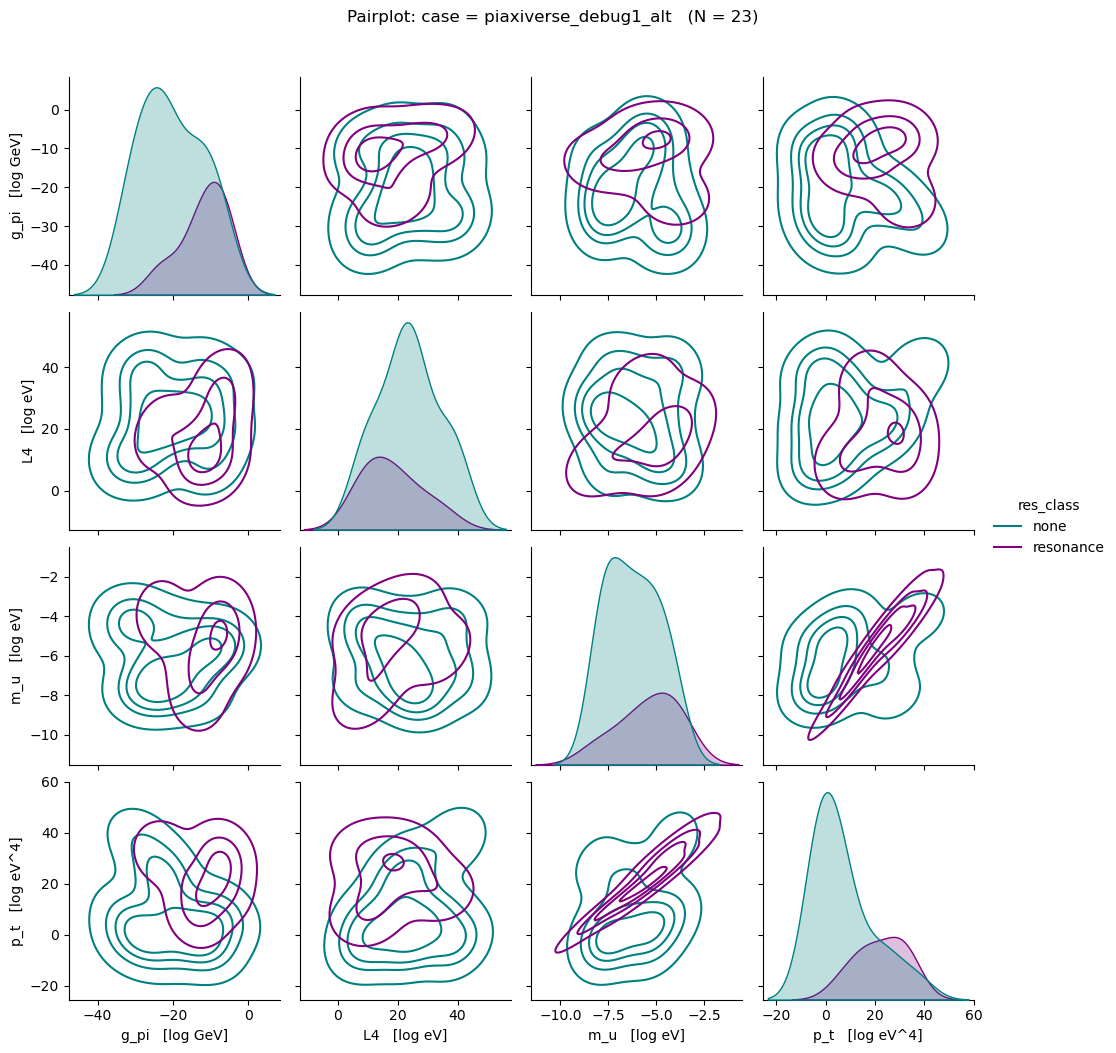

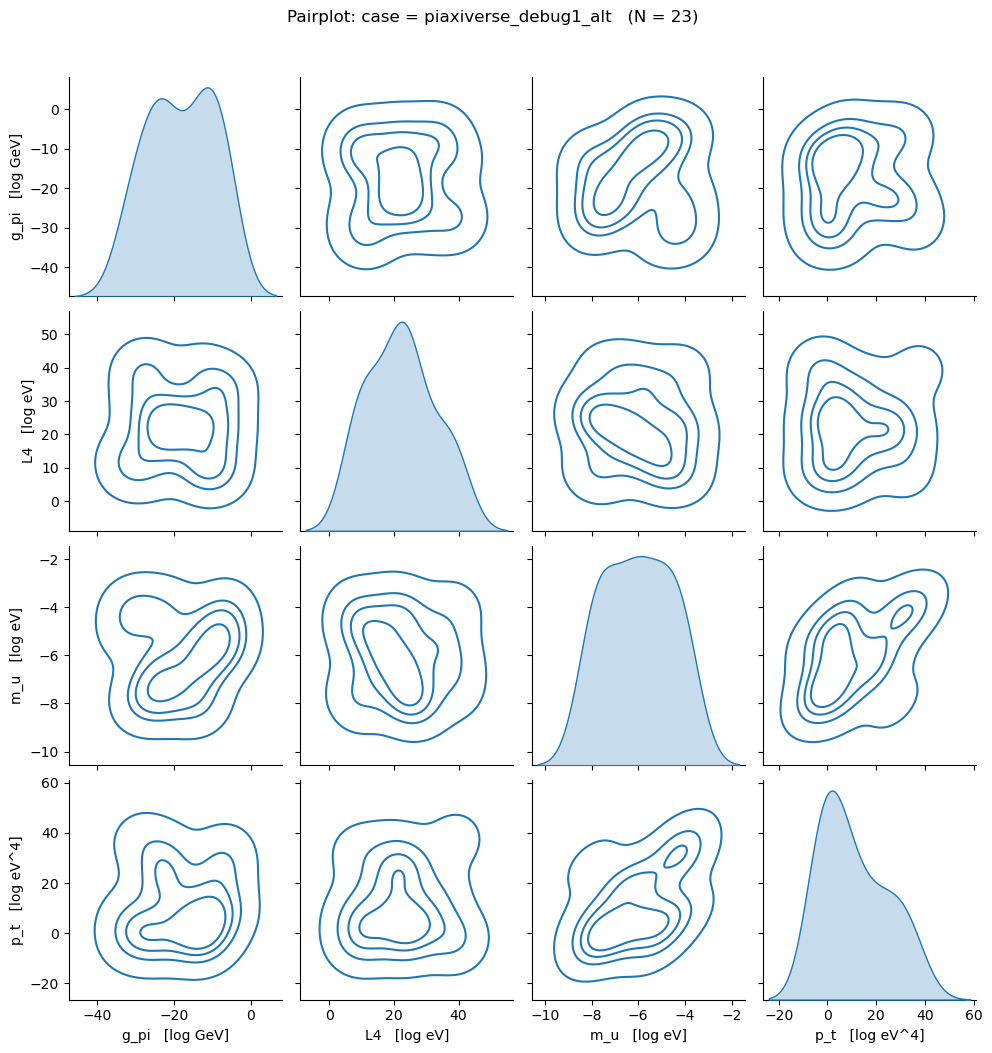

In [ ]:
from tools.dataset_utils import make_pairplot

## WIP: Addititional/alternative Pairplot Visualization and importance estimation
histogram, pairplot, heatmap = make_pairplot(corr_df, use_seaborn=False, pp_mode='kde',
                                             make_pairplot=True, make_heatmap=False, make_histograms=False,
                                             save_plots=False)

In [11]:
# Find and display subsets of imported data

# Show all 'burst' classification runs
if False:
    burst_df = full_df.copy(deep=True)
    burst_df = burst_df[burst_df['res_class'] == 'burst']
    #print(burst_df.describe())
    with pd.option_context('display.max_colwidth', None):
      print(burst_df['file_name']+'.json')

# Resonant but finite runs
if False:
    finite_df = full_df.copy(deep=True)
    finite_df = finite_df[finite_df['res_class'] == 'resonance']
    finite_df = finite_df[finite_df['t_res'] >= finite_df['t_span_1']]
    #print(finite_df.describe())
    with pd.option_context('display.max_colwidth', None):
      print(finite_df['file_name']+'.json')

## ML Analysis

              L4       g_pi        m_u        p_t    var_d_n
count  16.000000  16.000000  16.000000  16.000000  16.000000
mean   24.000000 -15.144560  -6.434375   9.780236   1.445518
std     9.660918   7.566455   1.297338  12.382784   1.577747
min     9.000000 -29.011782  -8.021490  -2.719764   0.081879
25%    19.000000 -22.761724  -7.561355  -2.719764   0.340256
50%    24.000000 -13.386774  -6.311463   7.280236   0.879169
75%    30.250000  -7.136721  -5.606311  18.530236   1.873989
max    39.000000  -7.136721  -4.011858  32.280236   5.656288
---------------------------------------
       res_class  res_ratio_f  res_ratio_m  res_freq_label  res_band_class  \
count  16.000000    16.000000    16.000000          16.000            16.0   
mean    0.250000          inf          inf           0.875             0.0   
std     0.447214          NaN          NaN           0.500             0.0   
min     0.000000     0.000000     0.000000           0.000             0.0   
25%     0.000000     

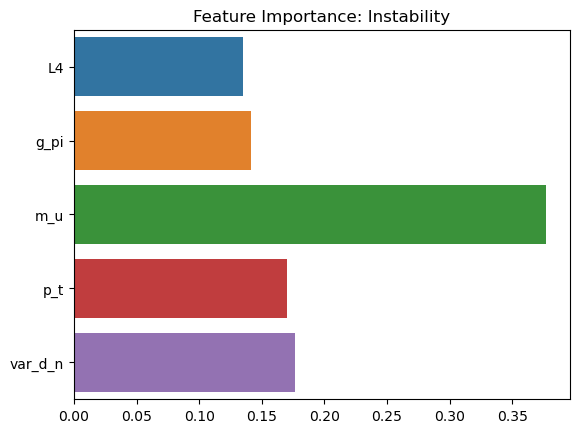

--------------------------
Accuracy: 0.714


In [12]:
## Preprocess data for ML analysis pipeline and assign numerical labels to string-valued parameters
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

ppnan = lambda S_in, nanval=-1: S_in.map(lambda x: np.nan if x is None or x == 'None' else x, na_action='ignore').fillna(value=nanval)
def preprocess_df(X_df_in):
    signal_cols = ['res_freq_class_AXP', 'res_freq_class_Afterglow', 'res_freq_class_CMB', 'res_freq_class_UIE', 'res_freq_class_FRB', 'res_freq_class_GRB']
    #print(X_df_in.isna().any())
    for nan_col in ['res_freq', 'res_band_0', 'res_band_1', 'inf_con'] + signal_cols:
        if nan_col in X_df_in:
            X_df_in[nan_col] = ppnan(X_df_in[nan_col])
    for nan_col in phase_parameters:
        if nan_col in X_df_in:
            X_df_in[nan_col] = ppnan(X_df_in[nan_col], 0)
    
    le = preprocessing.LabelEncoder()
    label_cols = ['config_name', 'int_method', 'res_class', 'res_band_class', 'res_freq_label', 'res_band_0', 'res_band_1'] + signal_cols
    filter_nonunique = True
    for col in X_df_in:
        if col in label_cols:
            X_df_in[col] = le.fit_transform(X_df_in[col])
        if col in log_params:
            X_df_in[col] = X_df_in[col].replace({-1: 1}) # WIP fix for L3 being set to -1 when it is irrelevant
            X_df_in[col] = np.log10(X_df_in[col])
        if filter_nonunique:
            if len(X_df_in[col].unique()) <= 1 and col not in keep_params:
                #if col in input_parameters or col in sim_settings_parameters:
                    drop_col(col, plot_data_in=X_df_in, plot_params_in=[])
    return X_df_in

#with pd.option_context("mode.copy_on_write", True):
X_df = corr_df.copy(deep=True)
X_df = preprocess_df(X_df)

#print(X_df.isna().any())
#overwrite_nans = True
#if overwrite_nans:
#    X_df = X_df.map(lambda x: -1 if pd.isnull(x) or x == np.nan else x)
#print(X_df.describe())

# Pair plot for N_r, N_n, N_c, F
if False:
    pp = sns.pairplot(X_df,  x_vars=['F', 'eps','L3', 'L4', 'm_q'], y_vars=['N_r', 'N_n', 'N_c', 'N_tot'], hue='res_class')
    plt.show()

# Split data into train and test
train, test = train_test_split(X_df, test_size=0.3)

# Separate inputs and outputs
#output_params = ['res_class']
output_params = ['res_class', 'res_ratio_f', 'res_ratio_m', 'res_freq', 'res_freq_label', 'res_band_class', 'time_elapsed', 't_res']
observable_dependents = (['g_pi'] if 'g_pi' not in plot_params else ['F']  if 'F' not in plot_params else []) + \
                        (['g_2']  if 'g_2'  not in plot_params else ['l2'] if 'l2' not in plot_params else []) + \
                        (['g_3']  if 'g_3'  not in plot_params else ['L3'] if 'L3' not in plot_params else []) + \
                        (['g_4']  if 'g_4'  not in plot_params else ['L4'] if 'L4' not in plot_params else []) + \
                        (['m_q']  if 'm_q'  not in plot_params else ['m_u'] if 'm_u' not in plot_params else [])
dependent_params = ['m_0', 't_u', 'qm_0', 'qm_1', 'qm_2'] + observable_dependents
theory_params = ['disable_B', 'disable_P', 'disable_C', 'disable_D', 'qc_0', 'qc_1', 'qc_2', 'qc_3', 'qc_4', 'qc_5']
config_params = ['config_name', 't_num', 'k_num', 'k_span_0', 'k_span_1']
train_params = [out_param for out_param in output_params if out_param in train.columns]
keep_phase_params = ['var_d_n']
drop_phase_params = [phase_param for phase_param in phase_parameters if phase_param not in keep_phase_params]
drop_params = [drop_param for drop_param in (train_params + dependent_params + config_params + theory_params + drop_phase_params) if drop_param in train.columns]

X_train = train.drop(columns=drop_params)
y_train = train[train_params]
X_test = test.drop(columns=drop_params)
y_test = test[train_params]

print(X_train.describe())
print('---------------------------------------')
print(y_train.describe())

# Model training and prediction
clf = RandomForestClassifier()
clf.fit(X_train, y_train['res_class'])  # For 'res_class', repeat for others
# Feature Importance
res_importance = clf.feature_importances_

## Visualization
# Plot feature importance
sns.barplot(x=res_importance, y=X_train.columns)
plt.title('Feature Importance: Instability')
plt.show()

# Evaluate accuracy
y_pred = clf.predict(X_test)
print('--------------------------')
accuracy = accuracy_score(y_test['res_class'], y_pred)
print(f'Accuracy: {accuracy:.3f}')

               F         L4        m_q        p_t
count  16.000000  16.000000  16.000000  16.000000
mean   26.410442  21.812500 -38.568585   8.217736
std     9.119805  10.160176   9.501225  13.319003
min    14.301030   9.000000 -52.477034  -2.719764
25%    19.769819  12.750000 -47.753851  -2.719764
50%    26.801061  24.000000 -37.539553   4.780236
75%    33.832387  25.250000 -32.070853   9.780236
max    39.301030  39.000000 -22.602060  37.280236
---------------------------------------
          time_elapsed
count               16
unique              16
top     0:07:16.538508
freq                 1


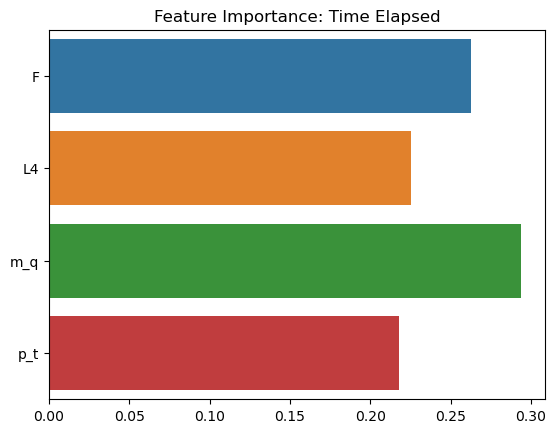

--------------------------
Accuracy: 0.000


In [13]:
# Split data into train and test
#print(time_df.describe())
T_df = preprocess_df(time_df.copy(deep=True))
train, test = train_test_split(T_df, test_size=0.3)

# Separate inputs and outputs
#output_params = ['res_class']
output_params = ['res_class', 'res_ratio_f', 'res_ratio_m', 'res_freq', 'res_freq_label', 'res_band_class', 'time_elapsed', 't_res']
observable_dependents = (['g_pi'] if 'g_pi' not in train.columns else ['F'] if 'F' not in train.columns else []) + (['m_q'] if 'm_q' not in train.columns else ['m_u'] if 'm_u' not in train.columns else [])
dependent_params = ['m_0', 'm_u', 't_u', 'qm_0', 'qm_1', 'qm_2'] + observable_dependents
theory_params = ['disable_B', 'disable_P', 'disable_C', 'disable_D', 'qc_0', 'qc_1', 'qc_2', 'qc_3', 'qc_4', 'qc_5']
config_params = ['config_name', 'k_span_0', 'k_span_1']
complexity_params = ['t_num', 'k_num', 'int_method', 'is_parallel', 'N_tot']
train_params = [out_param for out_param in output_params if out_param in train.columns]
drop_params = [drop_param for drop_param in (train_params + dependent_params + config_params + theory_params + phase_parameters) if drop_param in train.columns]

T_train = train.drop(columns=drop_params)
y_train = train[train_params]
T_test  = test.drop(columns=drop_params)
y_test  = test[train_params]

print(T_train.describe())
print('---------------------------------------')
print(y_train.describe())

# Model training and prediction
clf = RandomForestClassifier()
clf.fit(T_train, y_train['time_elapsed'])  # For 'res_class', repeat for others
# Feature Importance
time_importance = clf.feature_importances_

## Visualization
# Plot feature importance
sns.barplot(x=time_importance, y=T_train.columns)
plt.title('Feature Importance: Time Elapsed')
plt.show()

# Evaluate accuracy
y_pred = clf.predict(T_test)
print('--------------------------')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

In [14]:
# TODO: Neural Network parameter analysis
# - 3 (?) fully-connected input layers (to capture nonlinearity?)
#    - N = number of inputs? of all parameters? of arbitrarity selection of choice?
# - Variational autoencoder
#    - Depth = ???
#    - # of hidden layers / dimensionality of gaussian = ??? 
# (number of dependent variables? number of species? number of interaction vertices? arbitrary choice? compare quality of prediction and convergence speed / overfitting error for different N-1 to 0)

In [15]:
import os, sys
from pyaxi_utils import g_x_from_m_x, g_x_from_F_pi

# TODO/WIP: Plot heatmap or KDE ranges over AxionLimits for different configuration subsets
def plot_ALP_kde(data_in, verbosity=0, tex_fmt=True, fit_coupling=False):

    tools_dir = os.path.abspath(os.path.join('./tools'))
    if tools_dir not in sys.path:
        sys.path.append(tools_dir)

    # Shade of purple chosen for visibility against existing plot colors
    res_color  = '#b042f5'

    if 'g_pi' not in data_in.columns:
        if fit_coupling:
            data_in['g_pi'] = data_in.apply(lambda x, GeV=1e9: g_x_from_m_x(F_pi=x['m_u'], epsilon=x['eps'], lambda1=x['l1']), axis=1)
        else:
            data_in['g_pi'] = data_in.apply(lambda x, GeV=1e9: g_x_from_F_pi(F_pi=x['F']/GeV), axis=1)

    zoomed_out = True
    centered = False
    if zoomed_out:
        m_ref_min = 1e-22
        m_ref_max = 1e3
        g_ref_min = 1e-28
        g_ref_max = 1e-5
    else:
        m_ref_min = 1e-12
        m_ref_max = 1e2
        g_ref_min = 1e-21
        g_ref_max = 1e-8
    if centered:
        m_min = np.max([np.min(data_in['m_u'])*1e-2,  m_ref_min])
        m_max = np.min([np.max(data_in['m_u'])*1e2,   m_ref_max])
        g_min = np.max([np.min(data_in['g_pi'])*1e-2, g_ref_min])
        g_max = np.min([np.max(data_in['g_pi'])*1e2,  g_ref_max])
    else:
        m_min = np.min([np.min(data_in['m_u'])*1e-2,  m_ref_min])
        m_max = np.max([np.max(data_in['m_u'])*1e2,   m_ref_max])
        g_min = np.min([np.min(data_in['g_pi'])*1e-2, g_ref_min])
        g_max = np.max([np.max(data_in['g_pi'])*1e2,  g_ref_max])

    # Import plotting functions from AxionLimits and set up AxionPhoton plot
    from PlotFuncsLocal import FigSetup, AxionPhoton, MySaveFig, BlackHoleSpins, FilledLimit, line_background
    fig, ax = FigSetup(Shape='Rectangular', ylab='$|g_{\pi\gamma\gamma}|$ [GeV$^{-1}$]', mathpazo=True,
                       m_min=m_min, m_max=m_max, g_min=g_min, g_max=g_max)

    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    ## Populate standard AxionPhoton limits plot
    
    # Separate z-layers for axion mass-coupling projections and experimental bounds
    ax0 = plt.gcf().add_subplot()
    ax0.set_xscale('log')
    ax0.set_xlim(xmin, xmax)
    ax0.set_yscale('log')
    ax0.set_ylim(ymin, ymax)
    ax0.axis('off')
    ax0.set_zorder(1)
    
    # Plot QCD axion lines and experimental bounds
    AxionPhoton.QCDAxion(ax0,C_center=abs(5/3-1.92)*(44/3-1.92)/2,C_width=0.7,vmax=1.1)
    
    ## TODO: Verify we are using the appropriate equation to calculate the g_pi-m_pi relation
    # Reference Lines
    AxionPhoton.piAxion(ax0,epsilon=1,lambda1=1,theta=1,label_mass=1e-2,C_logwidth=10,cmap='Greys',fs=18,rot = 6.0,
                    C_center=1,C_width=1.2,vmax=0.9)
    AxionPhoton.piAxion(ax0,epsilon=0.5,lambda1=1,theta=1,label_mass=1e-2,C_logwidth=10,cmap='Greys',fs=18,rot = 6.0,
                    C_center=1,C_width=1.2,vmax=0.9)
    AxionPhoton.piAxion(ax0,epsilon=0.01,lambda1=1,theta=1,label_mass=1e-2,C_logwidth=10,cmap='Greys',fs=18,rot = 6.0,
                    C_center=1,C_width=1.2,vmax=0.9)
    
    # Now the experimental bounds
    ax1 = plt.gcf().add_subplot()
    ax1.set_xscale('log')
    ax1.set_xlim(xmin, xmax)
    ax1.set_yscale('log')
    ax1.set_ylim(ymin, ymax)
    ax1.axis('off')
    ax1.set_zorder(3)
    
    AxionPhoton.Cosmology(ax1, text_on=False)
    #AxionPhoton.ColliderBounds(ax1, text_on=True)
    AxionPhoton.StellarBounds(ax1, text_on=False)
    AxionPhoton.SolarBasin(ax1, text_on=False)
    AxionPhoton.Haloscopes(ax1, projection=True, BASE_arrow_on=False, text_on=False)
    #AxionPhoton.HaloscopesUniform(ax1, projection=True, text_on=False)
    AxionPhoton.Helioscopes(ax1, projection=True, text_on=False)
    AxionPhoton.LSW(ax1, projection=True, text_on=False)
    AxionPhoton.LowMassAstroBounds(ax1, projection=True, text_on=False)
    AxionPhoton.ULAs(ax1, projection=True, text_on=False)

    # Dark matter astro/cosmo bounds:
    AxionPhoton.ALPdecay(ax1, projection=True, text_on=False)
    AxionPhoton.NeutronStars(ax1, text_on=False)
    AxionPhoton.AxionStarExplosions(ax1, text_on=False)

    data_QCD  = data_in[data_in['N_r']   ==  1]     # Plot only single field cases, for example
    data_SU3  = data_in[data_in['N_tot'] ==  3]     
    data_SU6  = data_in[data_in['N_tot'] == 20]     
    data_any  = data_in[data_in['N_r']   >=  1]     
    data_plt  = data_in
    
    ax2 = plt.gcf().add_subplot()
    ax2.set_xscale('log')
    ax2.set_xlim(xmin, xmax)
    ax2.set_yscale('log')
    ax2.set_ylim(ymin, ymax)
    ax2.axis('off')
    ax2.set_zorder(2)

    # Format color scheme
    hue_order = ['res_class']
    palette = {'resonance': 'magenta', 'burst': 'orange', 'none': 'teal', 'damp': 'grey'}
    
    sns.kdeplot(ax=ax2, data=data_plt, x='m_u', y='g_pi', hue=hue_order[0], palette=palette, levels=3, fill=False, alpha=0.7, legend=False)
    
    '''
    ## Plot star marker for this specific parameter configuration
    # Primary data
    ax1 = plt.gcf().add_subplot()
    ax1.set_xscale('log')
    ax1.set_xlim(xmin, xmax)
    ax1.set_yscale('log')
    ax1.set_ylim(ymin, ymax)
    ax1.axis('off')
    ax1.set_zorder(3)
    #g_u = GeV/F
    if fit_coupling:
        g_u = g_x_from_m_x(m_u, epsilon=eps, lambda1=l1)
    else:
        g_u = g_x_from_F_pi(F_pi=F/GeV, eps=eps, l1=l1)
    ax1.scatter(m_u, g_u, s=2000, c='white', marker='*')
    ax1.scatter(m_u, g_u, s=1000, c=res_color, marker='*')

    # Secondary Data
    ax2 = plt.gcf().add_subplot()
    ax2.set_xscale('log')
    ax2.set_xlim(xmin, xmax)
    ax2.set_yscale('log')
    ax2.set_ylim(ymin, ymax)
    ax2.axis('off')
    ax2.set_zorder(2)
    if len(m[0] > 1):
        for m_v in m[0][1:]:
            if fit_coupling:
                g_v = g_x_from_m_x(m_v, epsilon=eps, lambda1=l1)
            else:
                g_v = g_x_from_F_pi(F_pi=F/GeV, eps=eps, l1=l1)
            ax2.scatter(m_v, g_v, s=1000, c='grey', marker='*')
    '''
    #plt.legend()
    plt.show()

    
#with pd.option_context("mode.copy_on_write", True):
ALP_df = corr_df.copy(deep=True)
with pd.option_context('display.max_columns', None):
    #print(ALP_df.describe())
    print(ALP_df.columns)
plot_ALP_kde(ALP_df, verbosity=9, tex_fmt=False, fit_coupling=False)

Index(['A_0', 'A_pm', 'Adot_0', 'F', 'L3', 'L4', 'N_c', 'N_n', 'N_r', 'N_tot',
       'config_name', 'disable_B', 'disable_C', 'disable_D', 'disable_P',
       'eps', 'g_3', 'g_4', 'g_pi', 'g_qed', 'inf_con', 'int_method', 'k_0',
       'k_num', 'k_span_0', 'k_span_1', 'm_0', 'm_q', 'm_u', 'max_Th_c',
       'max_Th_n', 'max_Th_r', 'max_Th_tot', 'max_d_c', 'max_d_n', 'max_d_r',
       'max_d_tot', 'mean_Th_c', 'mean_Th_n', 'mean_Th_r', 'mean_Th_tot',
       'mean_d_c', 'mean_d_n', 'mean_d_r', 'mean_d_tot', 'min_Th_c',
       'min_Th_n', 'min_Th_r', 'min_Th_tot', 'min_d_c', 'min_d_n', 'min_d_r',
       'min_d_tot', 'mu_Th', 'mu_d', 'p_0', 'p_t', 'qc_0', 'qc_1', 'qc_2',
       'qc_3', 'qc_4', 'qc_5', 'qm_0', 'qm_1', 'qm_2', 'res_band_0',
       'res_band_1', 'res_band_class', 'res_class', 'res_con', 'res_freq',
       'res_freq_class_AXP', 'res_freq_class_Afterglow', 'res_freq_class_CMB',
       'res_freq_class_FRB', 'res_freq_class_GRB', 'res_freq_class_UIE',
       'res_freq_label', 'r

RuntimeError: latex was not able to process the following string:
b'$\\\\mathdefault{10^{0}}$'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(../70d13c9f7ce28605213e7095886a237b.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathpazo.sty)

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.6 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on 70d13c9f7ce28605213e7095886a237b.log.




<Figure size 1650x1100 with 4 Axes>

In [16]:
## WIP: Reduce dimensionality of input data parameter space with PCA

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Step 1: Load and pre-process dataset
X_df_pca_in = preprocess_df(corr_df.copy(deep=True))
X_df_pca_in['res_ratio_m'] = X_df_pca_in['res_ratio_m'].apply(lambda x: -1. if np.isnan(x) or np.isinf(x) else x)
X_df_pca_in['res_ratio_f'] = X_df_pca_in['res_ratio_f'].apply(lambda x: -1. if np.isnan(x) or np.isinf(x) else x)
#train, test = train_test_split(X_df_pca_in, test_size=0.3)

output_params = ['res_class', 'res_ratio_f', 'res_ratio_m', 'res_freq', 'res_freq_label', 'res_band_class', 'time_elapsed', 't_res']
observable_dependents = (['g_pi'] if 'g_pi' not in plot_params else ['F']  if 'F' not in plot_params else []) + \
                        (['g_2']  if 'g_2'  not in plot_params else ['l2'] if 'l2' not in plot_params else []) + \
                        (['g_3']  if 'g_3'  not in plot_params else ['L3'] if 'L3' not in plot_params else []) + \
                        (['g_4']  if 'g_4'  not in plot_params else ['L4'] if 'L4' not in plot_params else []) + \
                        (['m_q']  if 'm_q'  not in plot_params else ['m_u'] if 'm_u' not in plot_params else [])
dependent_params = ['m_0', 't_u', 'qm_0', 'qm_1', 'qm_2'] + observable_dependents
theory_params = ['disable_B', 'disable_P', 'disable_C', 'disable_D', 'qc_0', 'qc_1', 'qc_2', 'qc_3', 'qc_4', 'qc_5']
config_params = ['config_name', 't_num', 'k_num', 'k_span_0', 'k_span_1']
train_params = [out_param for out_param in output_params if out_param in X_df_pca_in.columns]
keep_phase_params = ['var_d_n']
#drop_phase_params = [phase_param for phase_param in phase_parameters if phase_param not in keep_phase_params]
drop_phase_params = []
drop_params = [drop_param for drop_param in (train_params + dependent_params + config_params + drop_phase_params) if drop_param in X_df_pca_in.columns]

#X_train = train.drop(columns=drop_params)
#y_train = train[train_params]
#X_test  = test.drop(columns=drop_params)
#y_test  = test[train_params]

X_df_pca_in.drop(columns=drop_params)
if True:
    print('Original dataframe: \n', X_df_pca_in.describe())
    #print('---------------------------------------')

#y_df = X_df_pca_in[train_params]
#print(y_df.describe())
#print('---------------------------------------')

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df_pca_in)

#print('---------------------------------------')
#print(pd.DataFrame(X_scaled, columns=X_df_pca_in.columns).describe())


# Step 3: Apply PCA and determine the number of components
# Compute PCA
pca = PCA(n_components=None)  # n_components can be set to a specific number or None for all components

# Fit PCA on the standardized data
pca.fit(X_scaled)

# Calculate cumulative explained variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Decide the number of components based on cumulative explained variance (e.g., 95%)
n_components = np.argmax(explained_variance_ratio >= 0.95) + 1

print('---------------------------------------')
print(f"Number of components needed to explain 95% variance: {n_components}")

# Step 4: Transform the data using PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Use the reduced data for further analysis or modeling
# For example, you can now use X_pca as input to a machine learning model

print(f"Original shape: {X_df_pca_in.shape}")
print(f"Reduced shape: {X_pca.shape}")

X_pca_df = pd.DataFrame(X_pca, columns=[f'PCA_{str(i).zfill(2)}' for i in range(n_components)])

print('---------------------------------------')
print(X_pca_df.describe())

Original dataframe: 
                F         L4  config_name           g_4       g_pi        m_0  \
count  23.000000  23.000000         23.0  2.300000e+01  23.000000  23.000000   
mean   25.306495  22.260870          0.0  3.173596e-03 -18.142186   6.018712   
std     8.577323  10.068932          0.0  6.156805e-03   8.577323   1.430704   
min    14.301030   9.000000          0.0  1.459854e-62 -32.136721   3.984008   
25%    18.988553  14.000000          0.0  7.299270e-33 -24.324284   4.849619   
50%    26.801061  24.000000          0.0  1.459854e-32 -19.636751   6.272369   
75%    31.488593  26.500000          0.0  1.459854e-12 -11.824244   7.425762   
max    39.301030  39.000000          0.0  1.459854e-02  -7.136721   8.021490   

             m_q        m_u    max_d_n    max_d_r  max_d_tot   mean_d_n  \
count  23.000000  23.000000  23.000000  23.000000  23.000000  23.000000   
mean  -37.632349  -6.018712   3.086797   2.147188   2.147188   2.057864   
std     9.291242   1.430704   1.

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Palatino


          PCA_00     PCA_01     PCA_02     PCA_03     PCA_04     PCA_05  \
count  18.000000  18.000000  18.000000  18.000000  18.000000  18.000000   
mean    0.369566  -0.019115   0.236931  -0.056597   0.078735   0.113206   
std     3.821989   2.285833   2.094307   1.776903   1.401853   1.232573   
min    -5.418562  -3.908007  -3.278461  -3.294661  -2.201267  -1.513102   
25%    -2.606971  -0.835528  -0.672314  -1.146721  -0.763105  -0.818105   
50%    -0.385609   0.167521  -0.371612   0.045998  -0.017376   0.053262   
75%     3.373552   1.779421   0.842234   1.078736   0.548044   0.554857   
max     6.794873   3.542181   6.159272   3.387306   3.513879   2.916296   

          PCA_06     PCA_07     PCA_08     PCA_09  
count  18.000000  18.000000  18.000000  18.000000  
mean    0.171334   0.119712   0.188117  -0.006489  
std     1.179727   0.986709   0.748486   0.792726  
min    -1.904885  -1.554834  -1.403557  -1.372838  
25%    -0.380843  -0.308310  -0.364749  -0.353271  
50%     0.11

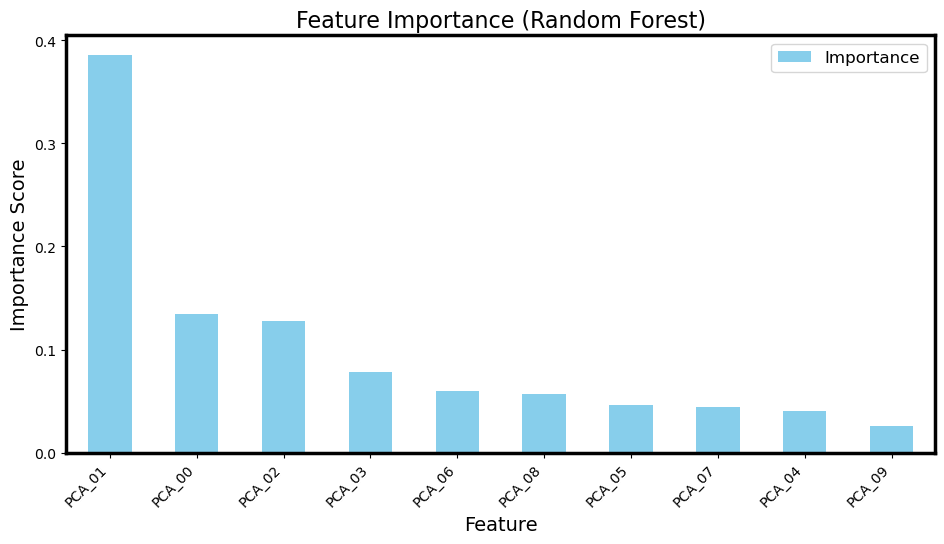

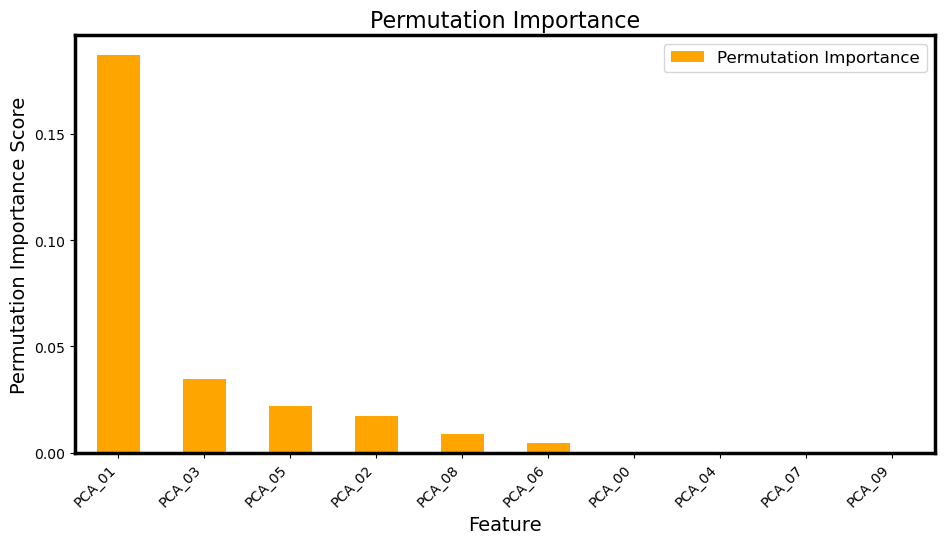

In [17]:
## TODO/WIP: RandomForestClassifier trained on input data with new reduced dimensionality and feature importance plotting
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

use_PCA_params = True
plot_permutation_importance = True
use_tex_format = False

if not use_tex_format:
    plt.rcParams.update({
        'text.usetex': False,
        'font.family': 'serif',
    })
    plt.rc('text', usetex=False)

# Generate synthetic dataset (example)
#n_samples = 10000
#n_features = 500  # High-dimensional space

#X = np.random.randn(n_samples, n_features)  # Input features
#y = np.random.binomial(1, 0.5, n_samples)   # Binary labels

if use_PCA_params:
    X_df_in = X_pca_df.copy(deep=True)
else:
    X_df_in = X_df.copy(deep=True)
    X_df_in = X_df_in.drop(columns=drop_params)

# Split data into training and testing sets
y_df = X_df['res_class']
X_train, X_test, y_train, y_test = train_test_split(X_df_in, y_df, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

print(X_train.describe())
print('-----------------------------')
print(y_train.describe())

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate accuracy
print('--------------------------')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

# Extract Feature Importances
feature_names = X_train.columns
feature_importances = clf.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot Feature Importances using matplotlib
#plt.figure(figsize=(10, 6))
fig1 = importance_df.plot(x='Feature', y='Importance', kind='bar', color='skyblue', figsize=(10,6), fontsize=10)

plt.title('Feature Importance (Random Forest)', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance Score', fontsize=14)
plt.legend(fontsize=12)
feature_labels = [r'$\texttt{%s}$' % feature_name for feature_name in importance_df['Feature']] if use_tex_format else importance_df['Feature']
plt.xticks(rotation=45, ha='right', labels=feature_labels, ticks=range(len(feature_labels)))
plt.tight_layout()
plt.show()

if plot_permutation_importance:
    # Optional - Calculate and Plot Permutation Importances
    result = permutation_importance(clf, X_df_in, y_df, n_repeats=10, random_state=42)
    perm_importance = pd.DataFrame({
        'Feature': feature_names,
        'Permutation Importance': result.importances_mean
    })

    # Sort by permutation importance in descending order
    perm_importance = perm_importance.sort_values('Permutation Importance', ascending=False)

    #plt.figure(figsize=(10, 6))
    fig2 = perm_importance.plot(x='Feature', y='Permutation Importance', kind='bar', color='orange', figsize=(10,6), fontsize=10)

    plt.title('Permutation Importance', fontsize=16)
    plt.xlabel('Feature', fontsize=14)
    plt.ylabel('Permutation Importance Score', fontsize=14)
    plt.legend(fontsize=12)
    feature_labels = [r'$\texttt{%s}$' % feature_name for feature_name in perm_importance['Feature']] if use_tex_format else perm_importance['Feature']
    plt.xticks(rotation=45, ha='right', labels=feature_labels, ticks=range(len(feature_labels)))
    plt.tight_layout()
    plt.show()

            Loading
count  3.300000e+01
mean   1.332748e-02
std    1.762578e-01
min   -3.401355e-01
25%   -9.685252e-02
50%    3.330669e-16
75%    4.374584e-02
max    4.203023e-01


<Figure size 1000x600 with 0 Axes>

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Palatino


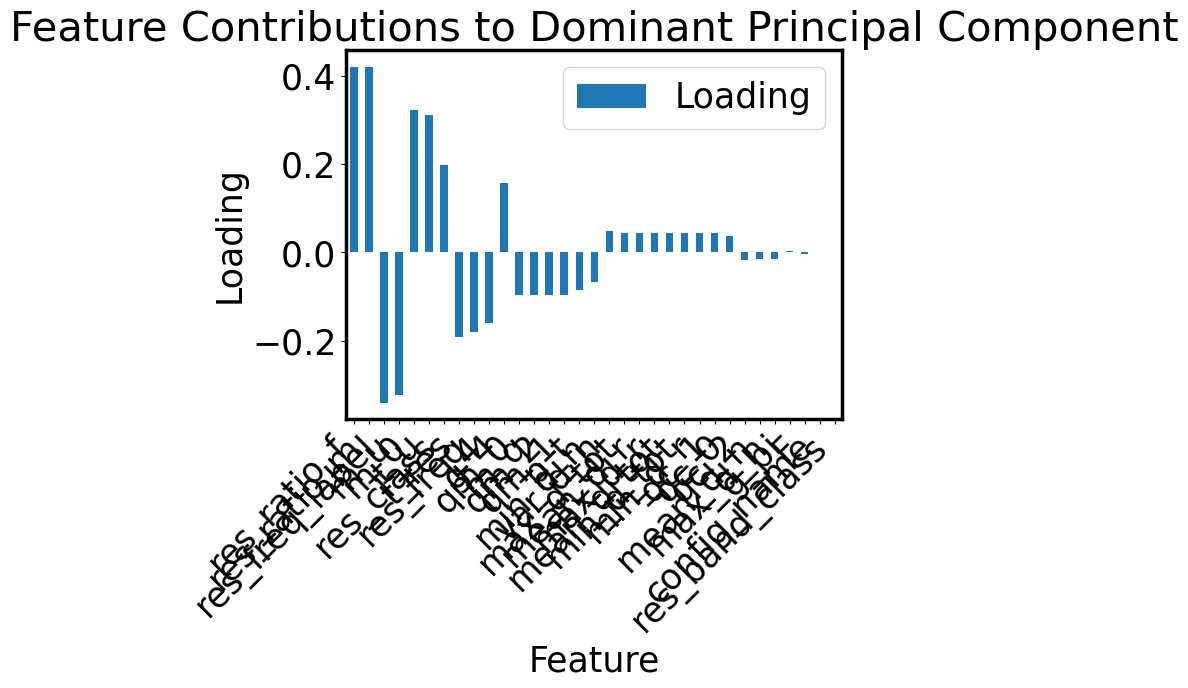

In [18]:
## Analyze PCA results
pca_in = pca

# TODO: Plot over a range of components
comp_in = pca_in.components_[2]

# Identify how much each component is contributing to the given PCA component
feature_contributions = pd.DataFrame({
    'Feature': X_df_pca_in.columns,
    'Loading': comp_in,
})
sorted_features = feature_contributions.sort_values(
    by='Loading', key=abs, ascending=False
)

print(sorted_features.describe())

# Plot their contributions
plt.figure(figsize=(10, 6))
sorted_features.plot(kind='bar', x='Feature', y='Loading')
plt.title('Feature Contributions to Dominant Principal Component')
plt.xlabel('Feature')
plt.ylabel('Loading')
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
## TODO/WIP: Variational Autoencoders 
##        - in order to learn and display instability plots
##        - in order to learn and display the above mass-coupling projection
##        - What should the dimensionality of the latent space be? N_f? number of free model parameters?
##            --> PCA?


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import os
from tensorboardX import SummaryWriter

# Define the VAE model
class VAE(nn.Module):
    def __init__(self, latent_dim=2):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256)
        )
        
        # Mean and log variance layers
        self.fc_mu = nn.Linear(256, latent_dim)
        self.fc_log_var = nn.Linear(256, latent_dim)
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Sigmoid()
        )
    
    def reparameterize(self, mu, log_var):
        """
        Reparameterization trick to sample from a normal distribution
        with mean and log variance.
        """
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def forward(self, x):
        # Encode
        h = self.encoder(x)
        mu = self.fc_mu(h)
        log_var = self.fc_log_var(h)
        
        # Reparameterize
        z = self.reparameterize(mu, log_var)
        
        # Decode
        reconstructed_x = self.decoder(z)
        
        return reconstructed_x, mu, log_var

# Define loss function
def vae_loss(reconstructed_x, x, mu, log_var):
    """
    VAE loss function: Reconstruction + KL divergence losses.
    """
    # BCE reconstruction loss
    bce_loss = nn.functional.binary_cross_entropy_with_logits(reconstructed_x, x.view(-1, 784))
    
    # KL divergence
    kl_div = -0.5 * torch.mean(1 + log_var - mu**2 - torch.exp(log_var))
    
    return bce_loss + kl_div

class PyaxiDataset(Dataset):
    def __init__(self, data_df):
        self.data = data_df.values
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return torch.tensor(self.data[idx])

# Set up training parameters
batch_size = 128
learning_rate = 0.001
num_epochs = 100
latent_dim = 2

# Data loading
#train_dataset = MNIST(root='data', train=True, transform=ToTensor(), download=True)
train_dataset_df = X_df.copy(deep=True)
print(train_dataset_df.describe())
print('-----------------------------------------------')
train_dataset = PyaxiDataset(train_dataset_df)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

print(train_loader.dataset)
print('----------------------------')

# Initialize model and optimizer
model = VAE(latent_dim=latent_dim)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Set up TensorBoard writer
writer = SummaryWriter('logs/vae_logs')

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    print(epoch)
    for i, x in enumerate(train_loader):
        print(i)
        print(x)
    for batch_idx, (x, _) in enumerate(train_loader):
        print(batch_idx)
        # Convert data to float and normalize
        x = x.float()
        
        # Forward pass
        reconstructed_x, mu, log_var = model(x)
        
        # Compute loss
        loss = vae_loss(reconstructed_x, x, mu, log_var)
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    # Calculate average loss for the epoch
    avg_loss = total_loss / len(train_loader)
    
    # Log to TensorBoard
    writer.add_scalar('training_loss', avg_loss, epoch)
    
    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# Close TensorBoard writer
writer.close()

                F          L4  config_name           g_4        g_pi  \
count  100.000000  100.000000        100.0  1.000000e+02  100.000000   
mean    27.769817   23.500000          0.0  2.043796e-03  -20.605508   
std      8.089425    9.936668          0.0  5.091023e-03    8.089425   
min     14.301030    9.000000          0.0  1.459854e-62  -32.136721   
25%     20.551084   14.000000          0.0  1.459854e-52  -29.011782   
50%     26.801061   24.000000          0.0  1.459854e-32  -19.636751   
75%     36.176091   34.000000          0.0  1.459854e-12  -13.386774   
max     39.301030   39.000000          0.0  1.459854e-02   -7.136721   

              m_0         m_q         m_u     max_d_n     max_d_r   max_d_tot  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     5.891875  -39.842224   -5.891875    3.245378    1.970006    1.970006   
std      1.237442    8.716609    1.237442    1.519761    1.656006    1.656006   
min      3.960113  -55.6020

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

In [ ]:
## TODO: Bilby analysis for parameter estimation?
##         - To ensure we recover injected signals from VAE output?
##         - Can we use Bilby to estimate parameters of model (N_f, masses, couplings) using power spectrum data?